In [1]:
import os, sys
import plac
import shutil
import warnings
import datetime
import numpy as np
import pandas as pd
from time import time
from astropy import wcs
import concurrent.futures
from dateutil import parser
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.coordinates import SkyCoord
from astropy.stats import sigma_clipped_stats as scs
warnings.simplefilter('ignore')
import seaborn as sns

from astropy.table import Table

from astroquery.irsa_dust import IrsaDust

from astropy.table import vstack

In [2]:
df = pd.read_csv("n6.csv")

In [3]:
fiducials = pd.read_csv("fiducials.csv")

In [4]:
EXT = pd.read_csv("omegacam_filter", delim_whitespace=True)

In [5]:
EXT.head()

,Filter,u,g,r,i,z
0,LAMeff,3629.82000,4820.35000,6292.11000,7493.68000,8837.89000
1,OMeff,400.00000,1020.00000,1100.00000,1200.00000,760.00000
2,ALAM/AV,1.55004,1.19096,0.85454,0.68156,0.49803


basti = pd.read_csv("FEHm140/13000z00062y248p00o1d1e1.isc_sloan", comment='#', delim_whitespace=True)

basti.head()

In [6]:
isodf = pd.read_csv("output102255877413.dat", delim_whitespace=True, comment = "#")

In [7]:
i10 = isodf[isodf["logAge"]==10.11394]

In [8]:
i10.tail()

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Xn,Xo,Cexcess,Z,mbolmag,umag,gmag,rmag,imag,zmag
185,0.0005,-1.49213,10.11394,0.792432,2.416049,0.607,2.715,3.6590,1.094,7,...,0.000036,0.000218,-1.0,0.001700,-2.018,1.321,-0.833,-1.803,-2.117,-2.316
186,0.0005,-1.49213,10.11394,0.792439,2.416051,0.572,2.760,3.6588,1.022,7,...,0.000038,0.000218,-1.0,0.001640,-2.131,1.267,-0.931,-1.915,-2.232,-2.432
187,0.0005,-1.49213,10.11394,0.792444,2.416053,0.535,2.795,3.6667,0.990,7,...,0.000039,0.000218,-1.0,0.001666,-2.217,0.888,-1.116,-2.024,-2.323,-2.512
188,0.0005,-1.49213,10.11394,0.792446,2.416054,0.510,2.806,3.6708,0.974,7,...,0.000040,0.000218,-1.0,0.001610,-2.246,0.712,-1.193,-2.062,-2.353,-2.536
189,0.0005,-1.49213,10.11394,1.134192,2.497230,0.554,-4.691,3.5367,7.971,9,...,0.000059,0.000218,-1.0,0.000369,16.499,22.843,19.258,17.480,16.565,16.030


In [9]:
i3 = i10[i10["label"]<=3]

In [10]:
i7 = i10[i10["label"]==7]

In [11]:
DM = 5*np.log10(4250) - 5.
Av = 0.16

## DeRedden

In [12]:
sns.set(style="whitegrid", font_scale=3.5, rc={'ytick.left': True,
                                               'xtick.bottom': True,
                                               })

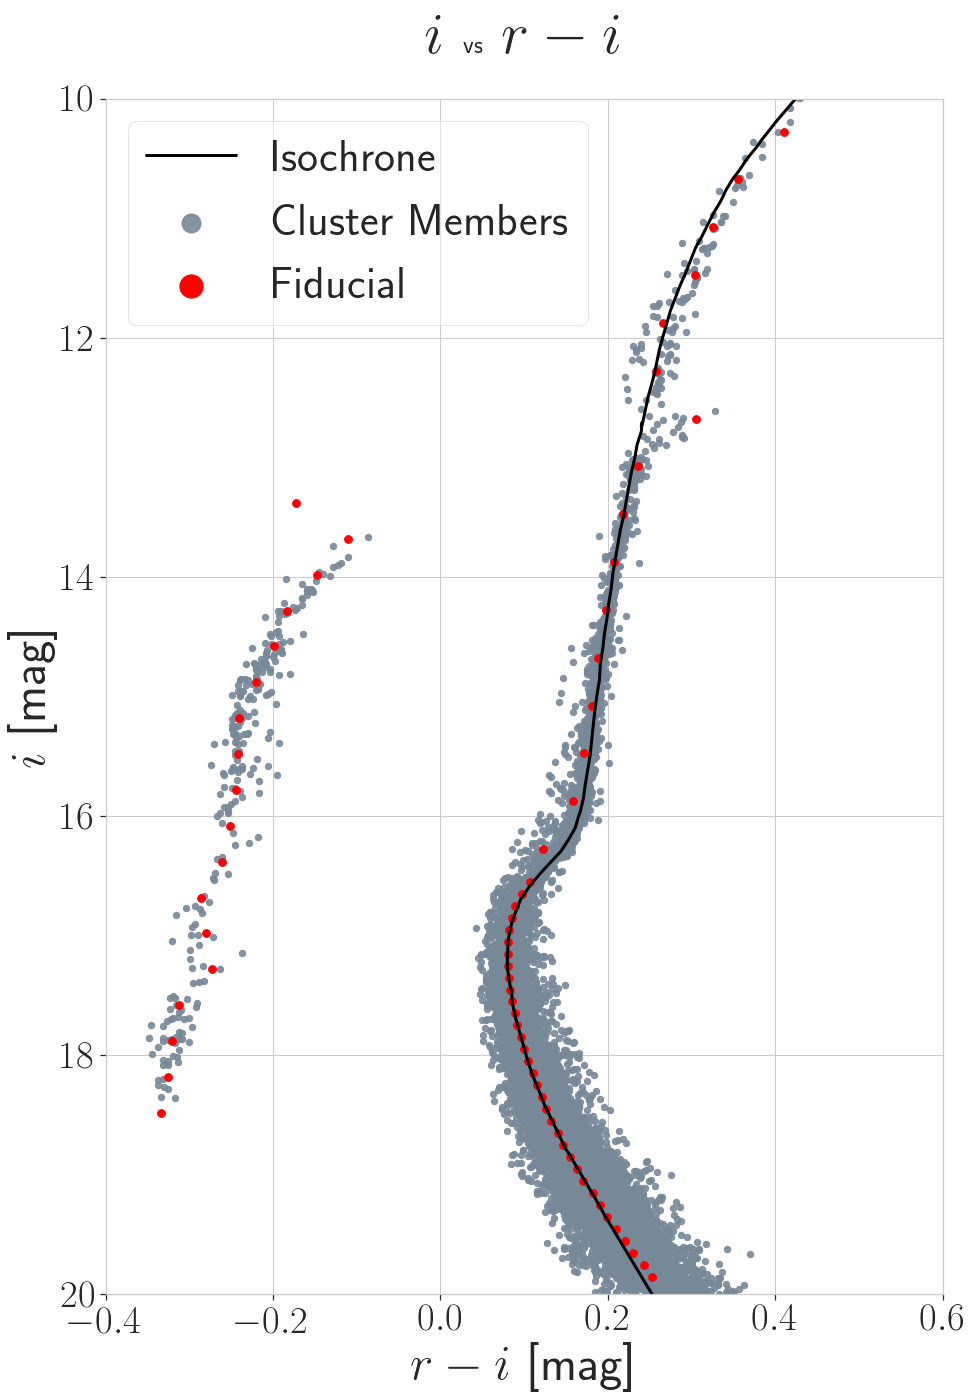

In [16]:
plt.figure(figsize=(15,22))
plt.rc('text', usetex=True)

rstep = 0.045
istep = 0.03
rcorr = -0.075 # - EXT.loc[2,"r"]*Av - rstep
icorr = -0.0 #- EXT.loc[2,"i"]*Av + istep

plt.scatter((df["r"] + rcorr) - (df["i"] + icorr), (df["i"] + icorr),
            s=40, c='lightslategrey', alpha=0.9, label="Cluster Members")


plt.plot(i3["rmag"] - i3["imag"] , i3["imag"] + DM,
         c="black", lw=3, label="Isochrone")


plt.scatter(fiducials["ri"] + rcorr - icorr, fiducials["mid"] + icorr,
            s=60, marker='o', c='red', label="Fiducial")


plt.ylim(20,10)
plt.xlim(-0.4,0.6)

#plt.tick_params(labelsize=30)

plt.ylabel(fr'$i$ [mag]', {"fontsize":50, "weight":"bold"})
plt.xlabel(fr'$r-i$ [mag]', fontdict={"fontsize":50, "weight":"bold"})

plt.legend(markerscale=3, fontsize=45, loc=2, fancybox=True, framealpha=0.5)

plt.title(fr"$i$ " + r"{\fontsize{25pt}{3em}\selectfont{}{vs}}"  + 
          fr" $r-i$", {"fontsize":60, "weight":"bold"}, pad=50)

plt.savefig("Iso_fiducial.tiff", dpi=500)

plt.show()
plt.close()